In [1]:
from dataset_Biked import BIKED_Dataset
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np
# from torchvision.transforms import Compose, Resize, Grayscale, ToTensor

# # Define the transformations
# transformations = Compose([
#     Resize((64, 64)),       # Resize to the target resolution
#     Grayscale(num_output_channels=1),  # Convert to grayscale (1 channel)
#     ToTensor()              # Convert to a PyTorch tensor
# ])

In [2]:
# Define the transformations
# transformations = transforms.Compose([
#     transforms.Resize((64, 64)),   
#     transforms.Grayscale(num_output_channels=1),  # Convert to grayscale (1 channel)
#     transforms.ToTensor(),
#     transforms.Lambda(lambda x: 1 - x)  # Inverts the pixel values
# ])

# Pass the transformations to the dataset
dataset = BIKED_Dataset(
    '../biked_data/BIKED Dataset/BIKED Dataset/Segmented bike images',
    # transform=transformations
)

In [4]:
dataset.reduce_resolution(target_resolution=(64, 64), apply_transformations=True)#convert_grayscale=True)

Processed images saved in: ../biked_data/BIKED Dataset/BIKED Dataset/Segmented bike images_res64x64


In [49]:
batch = next(iter(dataset))

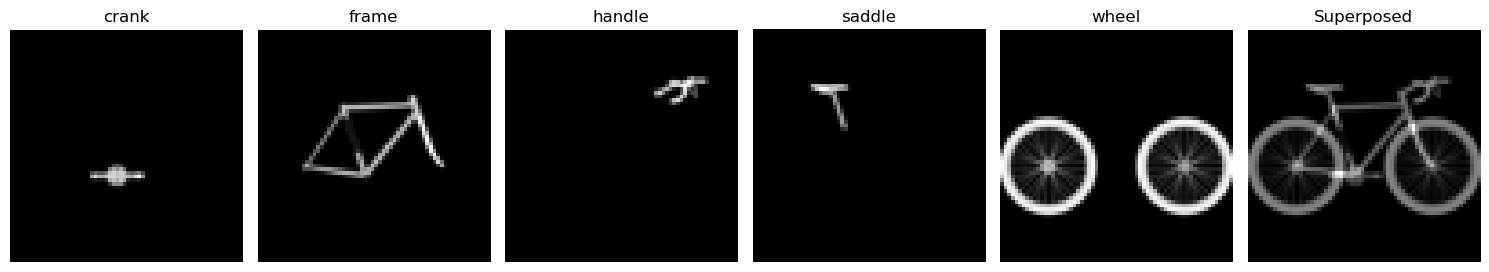

In [60]:
# Initialize the superposed image
superpose = np.zeros((64, 64))

# Prepare figure with subplots
fig, axes = plt.subplots(1, len(batch) + 1, figsize=(15, 5))

# Iterate through the batch to display each image and add to the superposed image
for idx, (k, v) in enumerate(batch.items()):
    np_v =  v.squeeze(0).cpu().numpy()  # Assuming v is already a numpy array for this demonstration
    superpose += np_v
    axes[idx].imshow(np_v, cmap="gray")
    axes[idx].set_title(k)
    axes[idx].axis("off")

# Display the superposed image in the final subplot
axes[-1].imshow(superpose, cmap="gray")
axes[-1].set_title("Superposed")
axes[-1].axis("off")

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


In [61]:
import torch
from torchvision.utils import make_grid
import matplotlib.pyplot as plt


# Stack all images into a tensor and compute the superposed image
images = torch.stack([v for v in batch.values()])
superpose = images.sum(dim=0).squeeze(0)

# Create a grid of the images
grid = make_grid(images, nrow=len(batch), padding=2, normalize=True)

# Plot the images and the superposed image
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Display the grid of images
axes[0].imshow(grid.permute(1, 2, 0).cpu().numpy(), cmap="gray")
axes[0].set_title("Image Grid")
axes[0].axis("off")

# Display the superposed image
axes[1].imshow(superpose.cpu().numpy(), cmap="gray")
axes[1].set_title("Superposed Image")
axes[1].axis("off")

plt.tight_layout()
plt.show()


In [1]:
# import os
# import random
# import shutil

# def create_train_test_split(source_dir, destination_dir, train_ratio=0.8, seed=42):
#     """
#     Splits the dataset into train and test sets with the same folder structure.

#     Args:
#         source_dir (str): Path to the source directory containing component subfolders.
#         destination_dir (str): Path to the destination directory where train and test folders will be created.
#         train_ratio (float): Proportion of the dataset to include in the train split (default is 0.8).
#         seed (int): Random seed for reproducibility (default is 42).

#     Returns:
#         None
#     """
#     train_dir = os.path.join(destination_dir, "train")
#     test_dir = os.path.join(destination_dir, "test")

#     # Ensure destination directories exist
#     def ensure_dir_exists(directory):
#         if not os.path.exists(directory):
#             os.makedirs(directory)

#     ensure_dir_exists(train_dir)
#     ensure_dir_exists(test_dir)

#     # Set random seed for reproducibility
#     random.seed(seed)

#     # Process each component
#     for component in os.listdir(source_dir):
#         component_path = os.path.join(source_dir, component)
#         if os.path.isdir(component_path):
#             # Create corresponding train and test subdirectories
#             train_component_dir = os.path.join(train_dir, component)
#             test_component_dir = os.path.join(test_dir, component)
#             ensure_dir_exists(train_component_dir)
#             ensure_dir_exists(test_component_dir)

#             # List all images in the component directory
#             images = [img for img in os.listdir(component_path) if img.lower().endswith((".png", ".jpg", ".jpeg"))]

#             # Shuffle images for randomness
#             random.shuffle(images)

#             # Split into train and test
#             split_index = int(len(images) * train_ratio)
#             train_images = images[:split_index]
#             test_images = images[split_index:]

#             # Copy images to train and test folders
#             for img in train_images:
#                 shutil.copy2(os.path.join(component_path, img), os.path.join(train_component_dir, img))
#             for img in test_images:
#                 shutil.copy2(os.path.join(component_path, img), os.path.join(test_component_dir, img))

#     print(f"Train and test sets created with {train_ratio*100:.0f}% train and {(1-train_ratio)*100:.0f}% test split.")

In [1]:
import os
import random
import shutil

def create_train_test_split(source_dir, destination_dir, train_ratio=0.8, seed=42):
    """
    Splits the dataset into train and test sets while keeping image names consistent across modalities.

    Args:
        source_dir (str): Path to the source directory containing component subfolders.
        destination_dir (str): Path to the destination directory where train and test folders will be created.
        train_ratio (float): Proportion of the dataset to include in the train split (default is 0.8).
        seed (int): Random seed for reproducibility (default is 42).
    """
    train_dir = os.path.join(destination_dir, "train")
    test_dir = os.path.join(destination_dir, "test")

    # Ensure destination directories exist
    def ensure_dir_exists(directory):
        if not os.path.exists(directory):
            os.makedirs(directory)

    ensure_dir_exists(train_dir)
    ensure_dir_exists(test_dir)

    # Set random seed for reproducibility
    random.seed(seed)

    # Step 1: Collect all unique bike IDs from all component folders
    bike_ids = set()
    component_folders = [comp for comp in os.listdir(source_dir) if os.path.isdir(os.path.join(source_dir, comp))]

    for component in component_folders:
        component_path = os.path.join(source_dir, component)
        for img in os.listdir(component_path):
            if img.lower().endswith((".png", ".jpg", ".jpeg")):
                bike_ids.add(os.path.splitext(img)[0])  # Extract unique bike IDs without extension

    bike_ids = sorted(list(bike_ids))  # Sort for reproducibility
    random.shuffle(bike_ids)  # Shuffle bikes

    # Step 2: Split bike IDs into train and test
    split_index = int(len(bike_ids) * train_ratio)
    train_bike_ids = set(bike_ids[:split_index])
    test_bike_ids = set(bike_ids[split_index:])

    # Step 3: Copy files while keeping the same split across all components
    for component in component_folders:
        component_path = os.path.join(source_dir, component)
        train_component_dir = os.path.join(train_dir, component)
        test_component_dir = os.path.join(test_dir, component)
        ensure_dir_exists(train_component_dir)
        ensure_dir_exists(test_component_dir)

        for img in os.listdir(component_path):
            if img.lower().endswith((".png", ".jpg", ".jpeg")):
                bike_id = os.path.splitext(img)[0]  # Extract bike ID
                src_path = os.path.join(component_path, img)

                if bike_id in train_bike_ids:
                    dst_path = os.path.join(train_component_dir, img)
                elif bike_id in test_bike_ids:
                    dst_path = os.path.join(test_component_dir, img)
                else:
                    continue  # Should not happen

                shutil.copy2(src_path, dst_path)

    print(f"✅ Train and test sets created with {train_ratio*100:.0f}% train and {(1-train_ratio)*100:.0f}% test split.")



In [2]:
# source_dir = '../biked_data/BIKED Dataset/BIKED Dataset/Segmented bike images_res64x64'
# destination_dir = '../biked_data/BIKED Dataset/BIKED Dataset/train_test_images_res64x64'
# create_train_test_split(source_dir, destination_dir, train_ratio=0.8, seed=42)

✅ Train and test sets created with 80% train and 20% test split.


In [5]:
import os

def verify_train_test_split(train_dir, test_dir):
    """
    Verifies:
    - Train and test have the same component folders.
    - Each component folder contains the same bike IDs.
    - No missing bike IDs in any component.
    - No overlapping bike IDs between train and test.

    Args:
        train_dir (str): Path to the train directory.
        test_dir (str): Path to the test directory.

    Returns:
        None (prints inconsistencies if found).
    """

    # Get list of component subfolders (e.g., crank, wheels, etc.)
    train_components = sorted([comp for comp in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, comp))])
    test_components = sorted([comp for comp in os.listdir(test_dir) if os.path.isdir(os.path.join(test_dir, comp))])

    # Step 1: Ensure the same subfolders exist in train and test
    if train_components != test_components:
        print("❌ Mismatch in component folders between train and test!")
        print(f"Train components: {train_components}")
        print(f"Test components: {test_components}")
        return

    print("✅ Train and test contain the same component subfolders.")

    # Step 2: Collect all bike IDs separately for each component
    train_bike_ids_per_component = {}
    test_bike_ids_per_component = {}

    for component in train_components:
        train_path = os.path.join(train_dir, component)
        test_path = os.path.join(test_dir, component)

        train_bike_ids_per_component[component] = set(
            os.path.splitext(img)[0] for img in os.listdir(train_path) if img.lower().endswith((".png", ".jpg", ".jpeg"))
        )
        test_bike_ids_per_component[component] = set(
            os.path.splitext(img)[0] for img in os.listdir(test_path) if img.lower().endswith((".png", ".jpg", ".jpeg"))
        )

    # Step 3: Compare all components to check name consistency
    print("\n📊 **Image Counts & Consistency Check per Component:**\n")
    
    inconsistencies = []

    # Print sizes and check missing IDs per component
    for component in train_components:
        train_size = len(train_bike_ids_per_component[component])
        test_size = len(test_bike_ids_per_component[component])

        print(f"📂 Component: {component}")
        print(f"   🟢 Train: {train_size} images")
        print(f"   🔵 Test: {test_size} images")

        # Compare the bike IDs across all components
        for other_component in train_components:
            if component == other_component:
                continue  # Skip self-comparison

            missing_in_component = train_bike_ids_per_component[component] - train_bike_ids_per_component[other_component]
            extra_in_component = train_bike_ids_per_component[other_component] - train_bike_ids_per_component[component]

            if missing_in_component:
                inconsistencies.append(f"⚠️ {component}: Missing {len(missing_in_component)} bikes compared to {other_component}: {sorted(missing_in_component)[:5]}...")
            if extra_in_component:
                inconsistencies.append(f"⚠️ {component}: Has {len(extra_in_component)} extra bikes compared to {other_component}: {sorted(extra_in_component)[:5]}...")

    # Step 4: Ensure train and test have non-overlapping bike IDs
    all_train_bike_ids = set.union(*train_bike_ids_per_component.values())
    all_test_bike_ids = set.union(*test_bike_ids_per_component.values())

    common_bike_ids = all_train_bike_ids & all_test_bike_ids
    if common_bike_ids:
        inconsistencies.append(f"🚨 Overlap detected: {len(common_bike_ids)} bikes appear in BOTH train and test! Examples: {sorted(common_bike_ids)[:5]}...")

    # Print inconsistencies if any
    if inconsistencies:
        print("\n🚨 **Issues Found:**\n" + "\n".join(inconsistencies))
    else:
        print("\n✅ All components have perfectly matching bike IDs and no train-test leakage!")

        
# source_dir = '../biked_data/BIKED Dataset/BIKED Dataset/Segmented bike images_res64x64'
destination_dir = '../biked_data/BIKED Dataset/BIKED Dataset/train_test_images_res64x64'
# Example usage:
train_dir = destination_dir+"/train"
test_dir = destination_dir+"/test"
verify_train_test_split(train_dir, test_dir)


✅ Train and test contain the same component subfolders.

📊 **Image Counts & Consistency Check per Component:**

📂 Component: crank
   🟢 Train: 3607 images
   🔵 Test: 902 images
📂 Component: frame
   🟢 Train: 3607 images
   🔵 Test: 902 images
📂 Component: handle
   🟢 Train: 3607 images
   🔵 Test: 902 images
📂 Component: saddle
   🟢 Train: 3607 images
   🔵 Test: 902 images
📂 Component: wheel
   🟢 Train: 3607 images
   🔵 Test: 902 images

✅ All components have perfectly matching bike IDs and no train-test leakage!
